In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 21.3 MB/s eta 0:00:0000:01


In [2]:
import shutil
import os

# Đường dẫn nguồn và đích
input_path = "/kaggle/input"
working_path = "/kaggle/working"

# Tạo thư mục working nếu chưa có
os.makedirs(working_path, exist_ok=True)

# Sao chép toàn bộ thư mục từ input xuống working
for folder_name in os.listdir(input_path):
    full_input_path = os.path.join(input_path, folder_name)
    full_working_path = os.path.join(working_path, folder_name)
    if os.path.isdir(full_input_path):
        shutil.copytree(full_input_path, full_working_path)

In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
image = cv2.imread("/kaggle/input/data-pbl-last/Data_Lately/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [5]:
import os
import matplotlib.pyplot as plt
def count_images(folder_path):
    files = os.listdir(folder_path)
    # Đếm số lượng file có định dạng hình ảnh (jpg, jpeg, png)
    image_count = sum(1 for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'txt')))
    return image_count

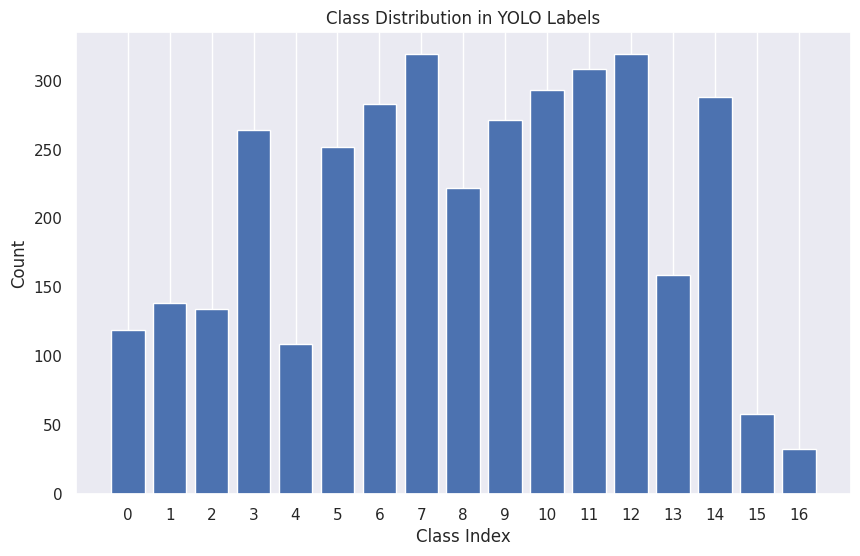

In [71]:
import os
import matplotlib.pyplot as plt
from collections import Counter

label_dir = "/kaggle/input/data-pbl-last/Data_Lately/train/labels"

class_counts = Counter()

for filename in os.listdir(label_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(label_dir, filename), 'r') as file:
            for line in file:
                class_index = int(line.split()[0])
                class_counts[class_index] += 1

sorted_counts = sorted(class_counts.items())

class_indices, counts = zip(*sorted_counts)

plt.figure(figsize=(10, 6))
plt.bar(class_indices, counts, tick_label=class_indices)
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Distribution in YOLO Labels')
plt.xticks(range(0, 17))
plt.grid(axis='y')
plt.show()


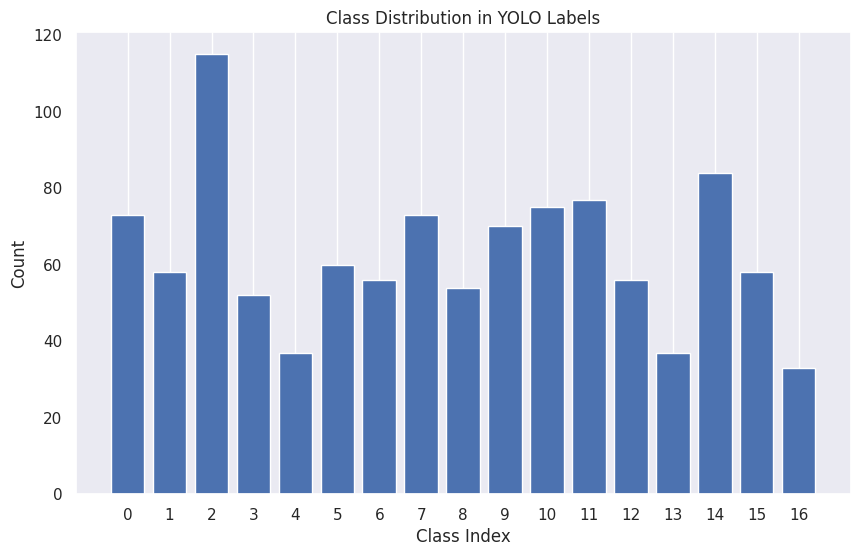

In [73]:
label_dir = "/kaggle/input/data-pbl-last/Data_Lately/valid/labels"

class_counts = Counter()

for filename in os.listdir(label_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(label_dir, filename), 'r') as file:
            for line in file:
                class_index = int(line.split()[0])
                class_counts[class_index] += 1

sorted_counts = sorted(class_counts.items())

class_indices, counts = zip(*sorted_counts)

plt.figure(figsize=(10, 6))
plt.bar(class_indices, counts, tick_label=class_indices)
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Distribution in YOLO Labels')
plt.xticks(range(0, 17))
plt.grid(axis='y')
plt.show()

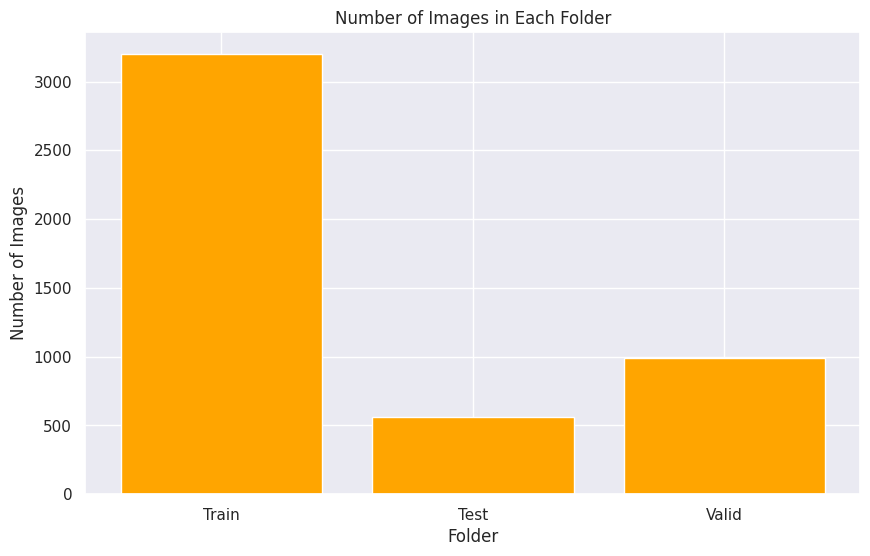

In [72]:
train_folder = '/kaggle/input/data-pbl-last/Data_Lately/train/images'
test_folder = '/kaggle/input/data-pbl-last/Data_Lately/test/images'
valid_folder = '/kaggle/input/data-pbl-last/Data_Lately/valid/images'

train_count = count_images(train_folder)
test_count = count_images(test_folder)
valid_count = count_images(valid_folder)

folders = ['Train', 'Test', 'Valid']
image_counts = [train_count, test_count, valid_count]

plt.figure(figsize=(10, 6))
plt.bar(folders, image_counts, color= "orange")
plt.xlabel('Folder')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.show()

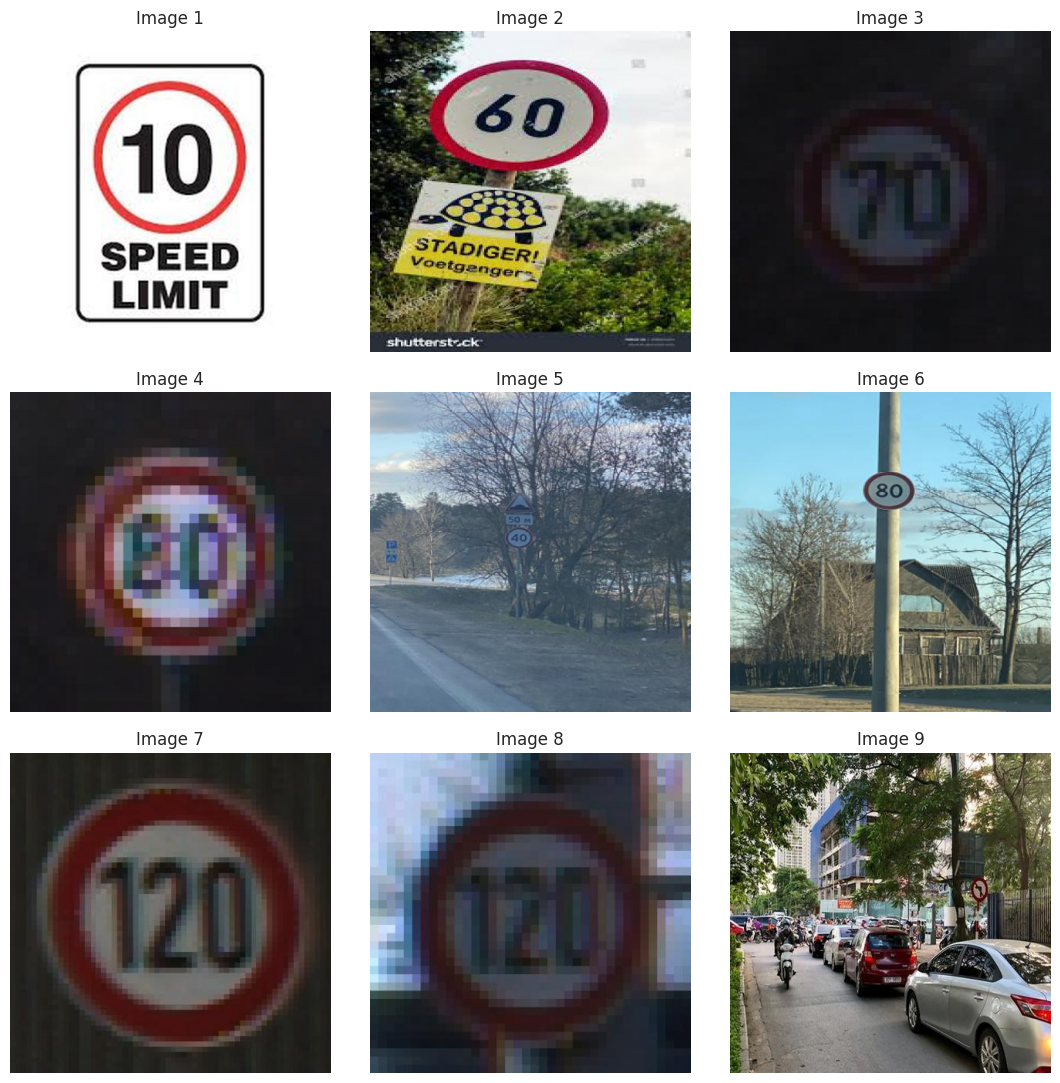

In [7]:
Image_dir = '/kaggle/input/data-pbl-last/Data_Lately/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### **Pre-train**

In [9]:
lastest_model = YOLO('/kaggle/input/model-ver5/model_v5.pt')

In [10]:
Result_Final_model = lastest_model.train(
    data="/kaggle/input/data-pbl-last/Data_Lately/data.yaml",
    epochs=100,
    imgsz=416,
    batch=64,
    lr0=0.0001,
    dropout=0.15,
    device=0,
    augment=True  # Enable data augmentation
)


Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/model-ver5/model_v5.pt, data=/kaggle/input/data-pbl-last/Data_Lately/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]
2024-06-12 10:19:32,249	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-12 10:19:33,151	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 118MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/data-pbl-last/Data_Lately/train/labels... 3199 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3199/3199 [00:03<00:00, 1009.17it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/data-pbl-last/Data_Lately/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/data-pbl-last/Data_Lately/valid/labels... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:01<00:00, 853.35it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/data-pbl-last/Data_Lately/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.53G     0.3635     0.3441      0.881        140        416: 100%|██████████| 50/50 [00:17<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        990       1067      0.971      0.915      0.956      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.49G     0.3789     0.3446     0.8853        114        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.975       0.92      0.951      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.43G     0.4079     0.3843     0.8933        123        416: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067       0.97      0.896      0.948       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.48G     0.4219     0.4165     0.8965        139        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.955      0.914      0.946      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.42G     0.4293     0.4172     0.8946        152        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.957      0.906      0.945      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.42G     0.4268     0.4251     0.8976        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.972      0.887      0.946      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.42G     0.4211     0.4189     0.8966        120        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        990       1067      0.954      0.905      0.948      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.48G     0.4215     0.4176     0.8956        150        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        990       1067      0.955      0.917      0.948      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.42G     0.4191     0.4027     0.8939        136        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.939      0.912      0.945      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.42G     0.4149     0.4076     0.8932        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067      0.954      0.921      0.949       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.42G     0.4219     0.4099     0.8953        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        990       1067      0.977       0.89      0.945       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.42G      0.422     0.4006     0.8957        138        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.959      0.901      0.944      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.42G     0.4227     0.4064     0.8949        147        416: 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.953      0.923       0.95       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.42G     0.4263     0.4091     0.8992        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.974      0.895      0.948      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.42G      0.418      0.402     0.8972        139        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        990       1067       0.96      0.903      0.942      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.42G     0.4191     0.4065     0.8931        133        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        990       1067      0.971      0.913      0.953      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.42G      0.412     0.3911      0.894        151        416: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067      0.961      0.901      0.944       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.42G       0.42     0.3947     0.8979        120        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        990       1067      0.966      0.881      0.941      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.42G     0.4208     0.4099     0.8969        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.958       0.92      0.951      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.42G      0.419     0.4061     0.8957        127        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.966      0.899      0.944      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.42G     0.4191     0.3957      0.896        124        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067      0.962      0.911      0.952      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.48G     0.4235     0.3959     0.8969        124        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        990       1067      0.968      0.913      0.947      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.42G     0.4124     0.3868     0.8949        143        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067      0.962      0.903      0.948      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.42G     0.4051     0.3825     0.8917        129        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067       0.95      0.914      0.949      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.42G       0.41     0.3933     0.8929        145        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067      0.951      0.915      0.946      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.42G     0.4115     0.3787     0.8906        138        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        990       1067      0.972      0.902       0.95      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.42G     0.4073     0.3812      0.889        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067       0.96      0.926      0.954       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.42G      0.405     0.3793     0.8915        115        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.965      0.927      0.952      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.42G     0.4129     0.3776     0.8912        164        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067      0.957      0.917      0.949      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.42G     0.4062     0.3811     0.8916        119        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.955      0.917      0.948      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.42G      0.407     0.3622     0.8916        128        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        990       1067      0.963      0.915       0.95      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.42G     0.4038     0.3755      0.891        142        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067      0.956      0.913      0.952      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.42G     0.4023     0.3626      0.889        127        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        990       1067      0.974      0.921      0.954      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.42G     0.4013     0.3733     0.8892        152        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        990       1067      0.963      0.917      0.953      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.42G     0.3973     0.3553     0.8896        126        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        990       1067      0.966      0.911      0.949      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.42G     0.3947     0.3537     0.8913        145        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        990       1067      0.971      0.907      0.955      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.42G     0.4034     0.3663       0.89        130        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        990       1067      0.974      0.914      0.954       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.42G     0.3955      0.356     0.8873        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.974      0.914      0.952      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.42G     0.3967     0.3592     0.8918        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067      0.973      0.924       0.95      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.42G     0.3944     0.3483     0.8872        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.968      0.914      0.951      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.42G     0.3907     0.3504     0.8892        122        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        990       1067      0.962      0.919      0.948      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.42G     0.3948     0.3434     0.8878        129        416: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067       0.98      0.917      0.956      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.42G     0.3864      0.351     0.8867        147        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.974       0.91       0.95      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.971      0.911      0.951      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.42G     0.3923      0.342     0.8899        130        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        990       1067      0.969      0.908      0.949      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.42G     0.3922     0.3425     0.8869        144        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067      0.951      0.936      0.954      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.42G     0.3882     0.3353     0.8896        122        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067      0.977      0.916      0.954      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.42G     0.3865     0.3368     0.8889        146        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.953      0.918      0.952      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.42G     0.3864     0.3348      0.885        136        416: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        990       1067      0.967      0.919      0.949      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.42G     0.3769     0.3401     0.8854        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        990       1067      0.964      0.921      0.952      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.42G     0.3849     0.3259     0.8858        133        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067       0.97      0.921      0.952      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.42G     0.3813     0.3374     0.8836        138        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067       0.96      0.921       0.95      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.42G     0.3825     0.3326      0.885        124        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.971      0.913      0.955      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.42G     0.3787     0.3295     0.8883        116        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        990       1067      0.978      0.922       0.96      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.42G     0.3807     0.3301      0.887        110        416: 100%|██████████| 50/50 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.981      0.922      0.956       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.42G     0.3793     0.3221     0.8818        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        990       1067      0.976       0.92      0.958      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.42G     0.3769     0.3185     0.8865        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067      0.972       0.92      0.953      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.42G     0.3683     0.3218     0.8798        135        416: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.977      0.915      0.957      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.48G     0.3702     0.3172      0.886        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.973      0.921      0.955      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.48G     0.3809     0.3245     0.8848        143        416: 100%|██████████| 50/50 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067      0.955      0.929      0.957      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.42G     0.3688     0.3139     0.8872        145        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        990       1067      0.974      0.918      0.955      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.42G     0.3651     0.3148     0.8803        138        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.976      0.919      0.958      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.42G     0.3734     0.3178     0.8856        127        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.975      0.915      0.955      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.42G     0.3649     0.3142     0.8817        144        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        990       1067      0.968      0.933      0.958      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.42G     0.3601     0.3077     0.8797        152        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.971      0.924      0.958      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.42G     0.3675     0.3047     0.8829        153        416: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        990       1067      0.971      0.927      0.957      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.42G      0.362     0.3081     0.8793        125        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        990       1067      0.975      0.916      0.957      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.42G     0.3654     0.3102     0.8841        130        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067      0.963      0.925      0.954      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.42G     0.3689     0.3093     0.8842        117        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        990       1067      0.975       0.92      0.956      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.42G     0.3634     0.2993     0.8801        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.971       0.93      0.957      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.42G     0.3614     0.3056     0.8829        135        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        990       1067      0.979      0.914      0.954      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.42G     0.3612     0.3039     0.8831        128        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.976      0.925      0.954      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.42G     0.3548     0.2983      0.877        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.968      0.927      0.954      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.42G     0.3612     0.3013     0.8819        127        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.973      0.913      0.951      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.42G     0.3592     0.2944     0.8798        130        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.967      0.923      0.951      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.42G     0.3585     0.2946     0.8783        117        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.969       0.93      0.956      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.42G      0.357     0.2913     0.8788        136        416: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067      0.961      0.927      0.953      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.42G     0.3535     0.2897     0.8799        129        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.965       0.93      0.955      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.42G     0.3551     0.2962     0.8798        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.979      0.924      0.959      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.48G     0.3511     0.2872     0.8853        123        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.976      0.924      0.957      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.42G     0.3519     0.2855      0.879        141        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.961      0.929      0.955      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.42G     0.3523     0.2871     0.8768        132        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.972      0.926      0.957      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.42G     0.3508     0.2886     0.8747        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        990       1067      0.966      0.928      0.957      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.42G     0.3541     0.2848      0.883        129        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.971      0.928      0.954      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.42G     0.3495     0.2847     0.8789        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        990       1067      0.972      0.927      0.956      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.42G     0.3411     0.2819     0.8782        140        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        990       1067      0.976      0.922      0.954      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.42G     0.3413     0.2775     0.8783        131        416: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067       0.97      0.928      0.956      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.42G     0.3435     0.2786     0.8817        139        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        990       1067      0.973      0.925      0.954      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.42G     0.3451     0.2831     0.8809        134        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.972      0.927      0.958      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.42G     0.3404     0.2662     0.8758        137        416: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.969       0.93      0.958      0.871


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.66G      0.309     0.1804     0.8206         71        416: 100%|██████████| 50/50 [00:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.968       0.93      0.957      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.42G     0.3037      0.175     0.8159         73        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        990       1067      0.963      0.931      0.956       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.42G     0.3009     0.1753     0.8187         66        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.968      0.934      0.957      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.42G     0.3015      0.175     0.8179         66        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        990       1067      0.972       0.93      0.957       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.42G     0.2973     0.1705      0.817         67        416: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        990       1067      0.966      0.931      0.958      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.42G     0.2968     0.1696     0.8198         67        416: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067      0.966      0.932      0.958       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.42G     0.2934     0.1661     0.8168         73        416: 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        990       1067      0.969       0.93      0.957      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.42G     0.2889      0.166     0.8194         68        416: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        990       1067      0.969      0.933      0.957      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.42G     0.2919     0.1676      0.815         66        416: 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        990       1067       0.97      0.932      0.959      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.42G     0.2904     0.1647     0.8136         70        416: 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        990       1067      0.968      0.932      0.959      0.872



100 epochs completed in 0.561 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]


                   all        990       1067      0.977      0.918      0.958      0.866
             Turn Left         70         73      0.983      0.779      0.862      0.762
            Turn Right         48         58       0.91      0.603      0.707      0.585
        Speed Limit 10        115        115      0.998          1      0.995      0.979
       Speed Limit 100         52         52      0.963      0.999      0.989        0.9
       Speed Limit 110         37         37          1      0.905      0.984      0.929
       Speed Limit 120         60         60       0.99      0.983       0.99      0.908
        Speed Limit 20         56         56      0.987      0.982      0.987      0.869
        Speed Limit 30         70         73      0.973      0.984      0.992      0.925
        Speed Limit 40         52         54       0.95      0.944      0.965      0.851
        Speed Limit 50         67         70      0.968      0.862      0.975      0.863
        Speed Limit 6

lr/pg0,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▆▄▃▃▂▄▅▁▅▄▄▅▄▅▆▄▄▅▆▄▅█▇▆▆▇▇▆▆▅▅▇▇▆▆▇▇▇▇▇
metrics/mAP50-95(B),▆▃▁▄▃▃▃▁▄▄▄▄▄▄▅▄▄▄▆▄▅▇▆▆▆▇▇▇▇▆▆▇▇▇▇████▇
metrics/precision(B),▆▆▆▂▇▂▆▅▄▄▆▅▄▄▆▆▄▆▁▅▆█▇▇▇▅▇▇▇▆▄█▆▆▆▆▄▆▅▇
metrics/recall(B),▅▃▂▆▂▆▅▁▅▄▄▇▅▆▄▆▆▅█▆▆▆▆▆▆█▅▆▇▅▇▆▇▇▇▇▇▇▇▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅▇███████▇▇▇▇▇▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▂▂▁▁


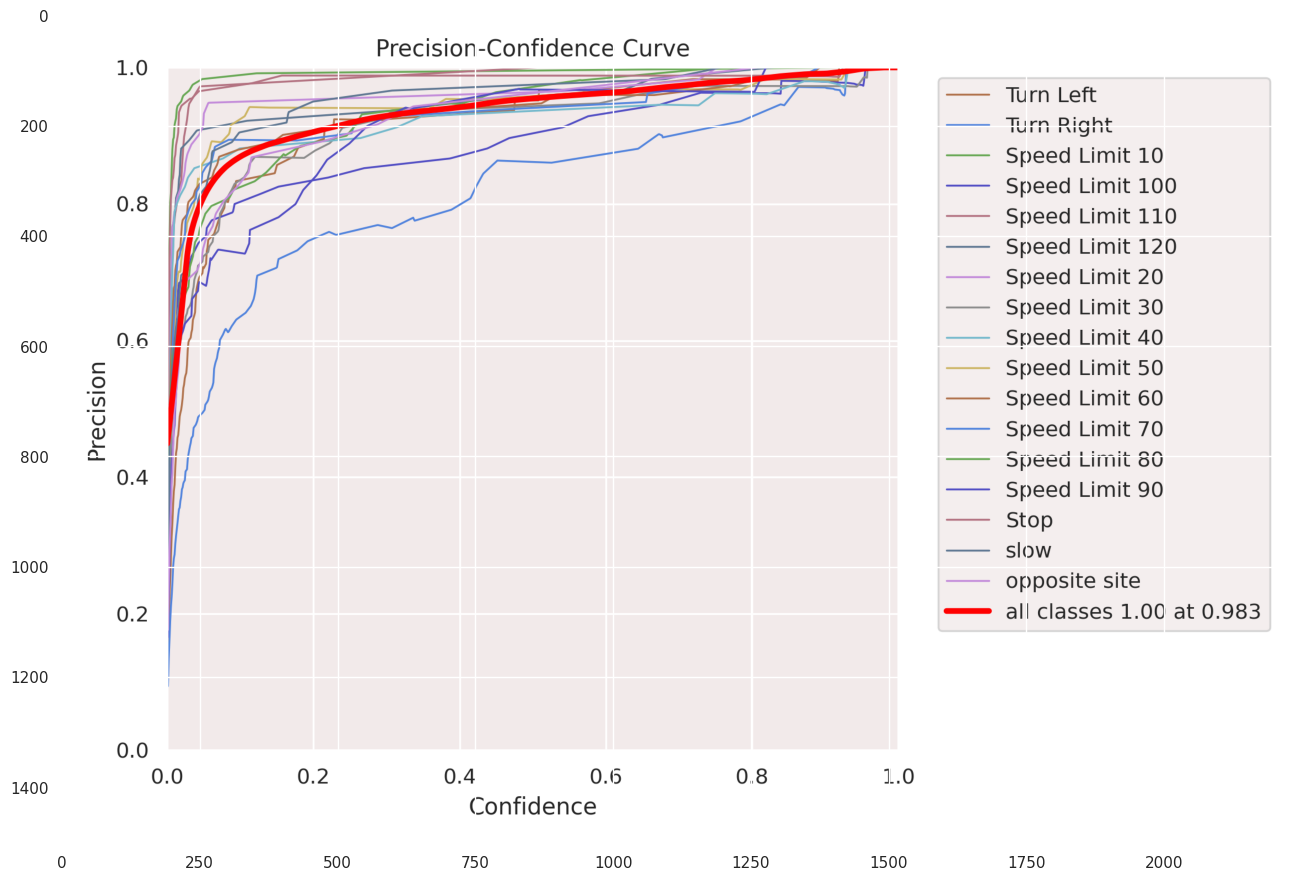

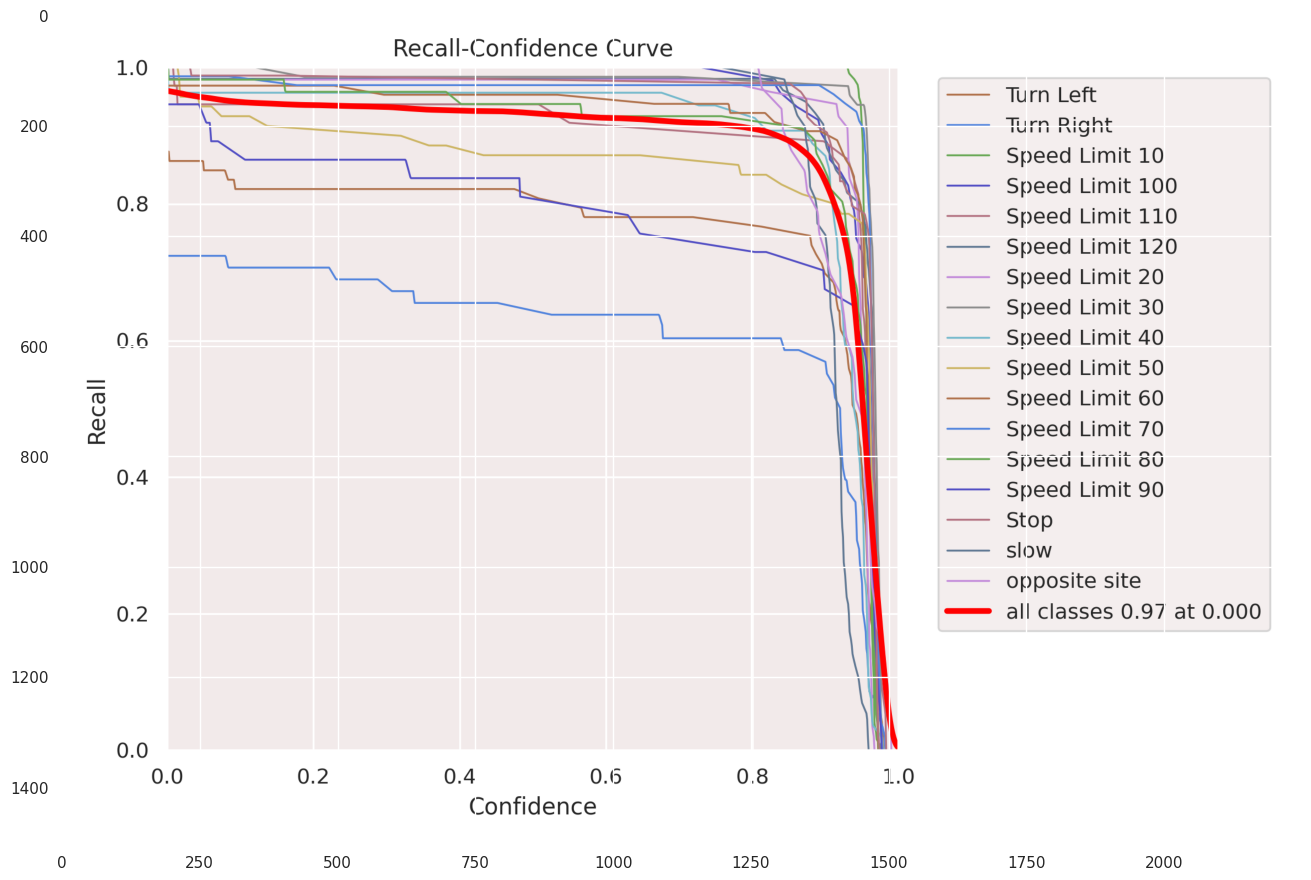

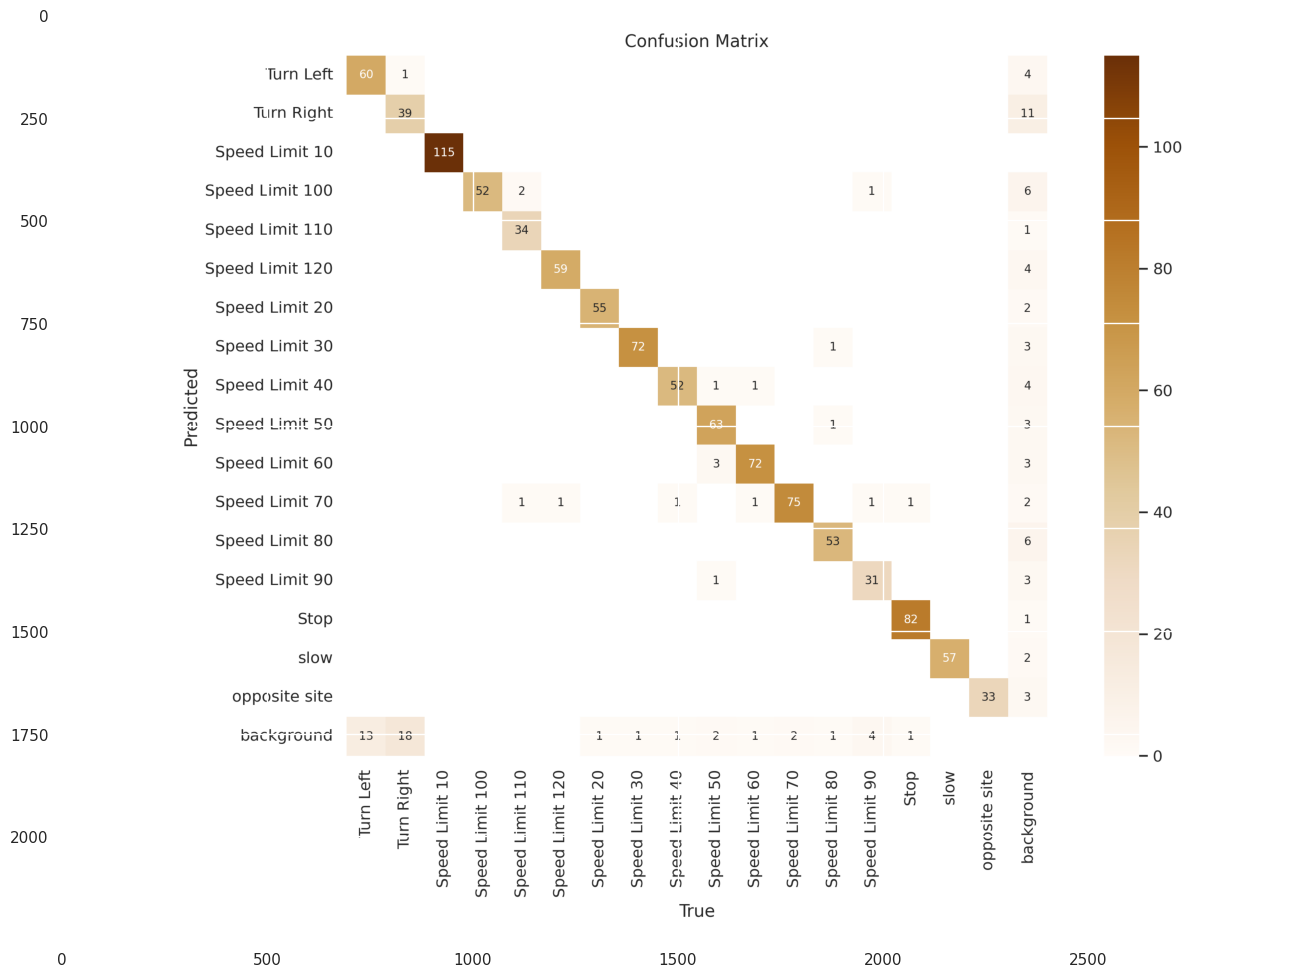

In [11]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

In [12]:
import os
import requests

In [48]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


image 1/1 /kaggle/working/7.png: 224x416 1 Speed Limit 70, 8.9ms
Speed: 1.0ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 416)


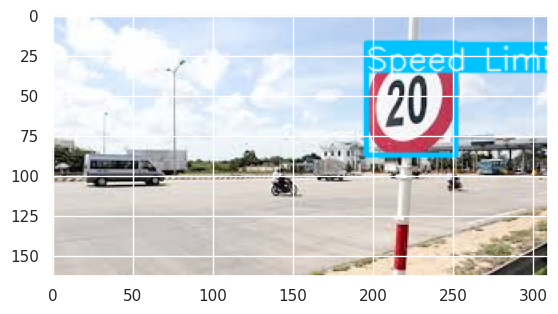

In [69]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFrXgzksqjacRz8NeltdhcFKlSGA6UGaQKKA&s'
res = requests.get(url)
if res.status_code == 200:
    with open('7.png', 'wb') as handler:
        handler.write(res.content)
        
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.cvtColor(model('7.png')[0].plot(), cv2.COLOR_BGR2RGB))


image 1/1 /kaggle/working/0.png: 288x416 1 Speed Limit 110, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 416)


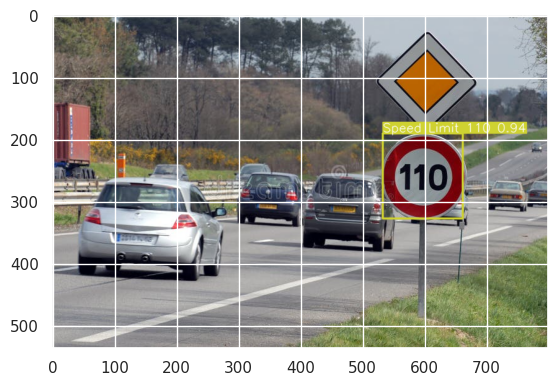

In [74]:
plt.imshow(cv2.cvtColor(model('0.png')[0].plot(), cv2.COLOR_BGR2RGB))


image 1/1 /kaggle/working/1.png: 416x416 1 Speed Limit 110, 1 opposite site, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


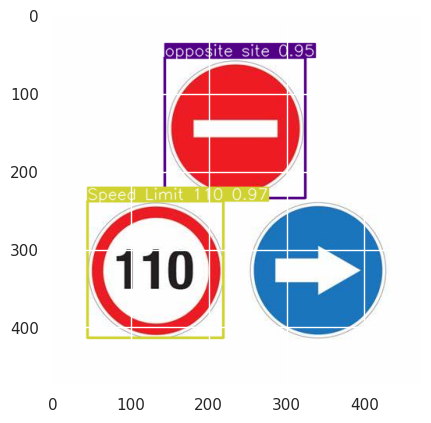

In [75]:
plt.imshow(cv2.cvtColor(model('1.png')[0].plot(), cv2.COLOR_BGR2RGB))


image 1/1 /kaggle/working/4.png: 416x416 1 Speed Limit 120, 1 Speed Limit 30, 1 Speed Limit 40, 1 Speed Limit 50, 1 Speed Limit 60, 1 Speed Limit 70, 10.0ms
Speed: 1.5ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


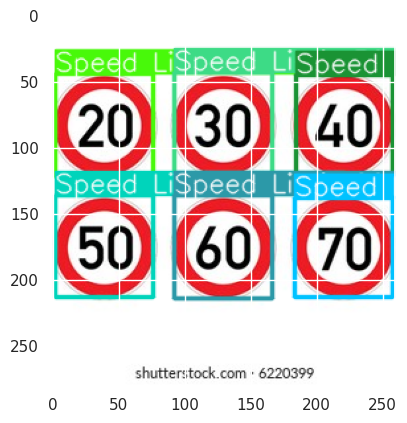

In [77]:
plt.imshow(cv2.cvtColor(model('4.png')[0].plot(), cv2.COLOR_BGR2RGB))